In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
names=["Plab[MeV]", "dPlab[MeV]", "sigma[mb]", "dsigma[mb]"]
usecols=[0, 1, 2, 3]
sep='\\s+'

In [3]:
def Ecm(Plab, mKm, mp):
    s = mKm**2 + mp**2 + 2 * mp * np.sqrt(mKm**2 + Plab**2)
    return np.sqrt(s)

def dEcm(Plab, dPlab, m1, m2):
    return m2 * Plab / (np.sqrt(m1**2 + Plab**2) * np.sqrt(m1**2 + m2**2 + 2*m2*np.sqrt(m1**2 + Plab**2) ) ) * dPlab

In [4]:
mKm = 493.68
mp = 938.272
Kbar0n = 939.565 + 497.65

In [5]:
Kmp = pd.read_csv('./Lambda1405/Kminus-p.dat', sep='\\s+', usecols=[0, 1, 2, 3], names=names, header=0)
Kmp_to_Kbar0n = pd.read_csv("./Lambda1405/Kbarnull-n.dat", sep=sep, usecols=usecols, names=names, header=0)
Kmp_to_Lampi0 = pd.read_csv("./Lambda1405/Lambda-pinull.dat", sep=sep, usecols=usecols, names=names, header=0)
Kmp_to_Sigmpip = pd.read_csv("./Lambda1405/Sigmaminus-piplus.dat", sep=sep, usecols=usecols, names=names, header=0)
Kmp_to_Sig0pi0 = pd.read_csv("./Lambda1405/Sigmanull-pinull.dat", sep=sep, usecols=usecols, names=names, header=0)
Kmp_to_Sigppim = pd.read_csv("./Lambda1405/Sigmaplus-piminus.dat", sep=sep, usecols=usecols, names=names, header=0)

In [6]:
columns = ["Ecm", "sigma", "dsigma"]

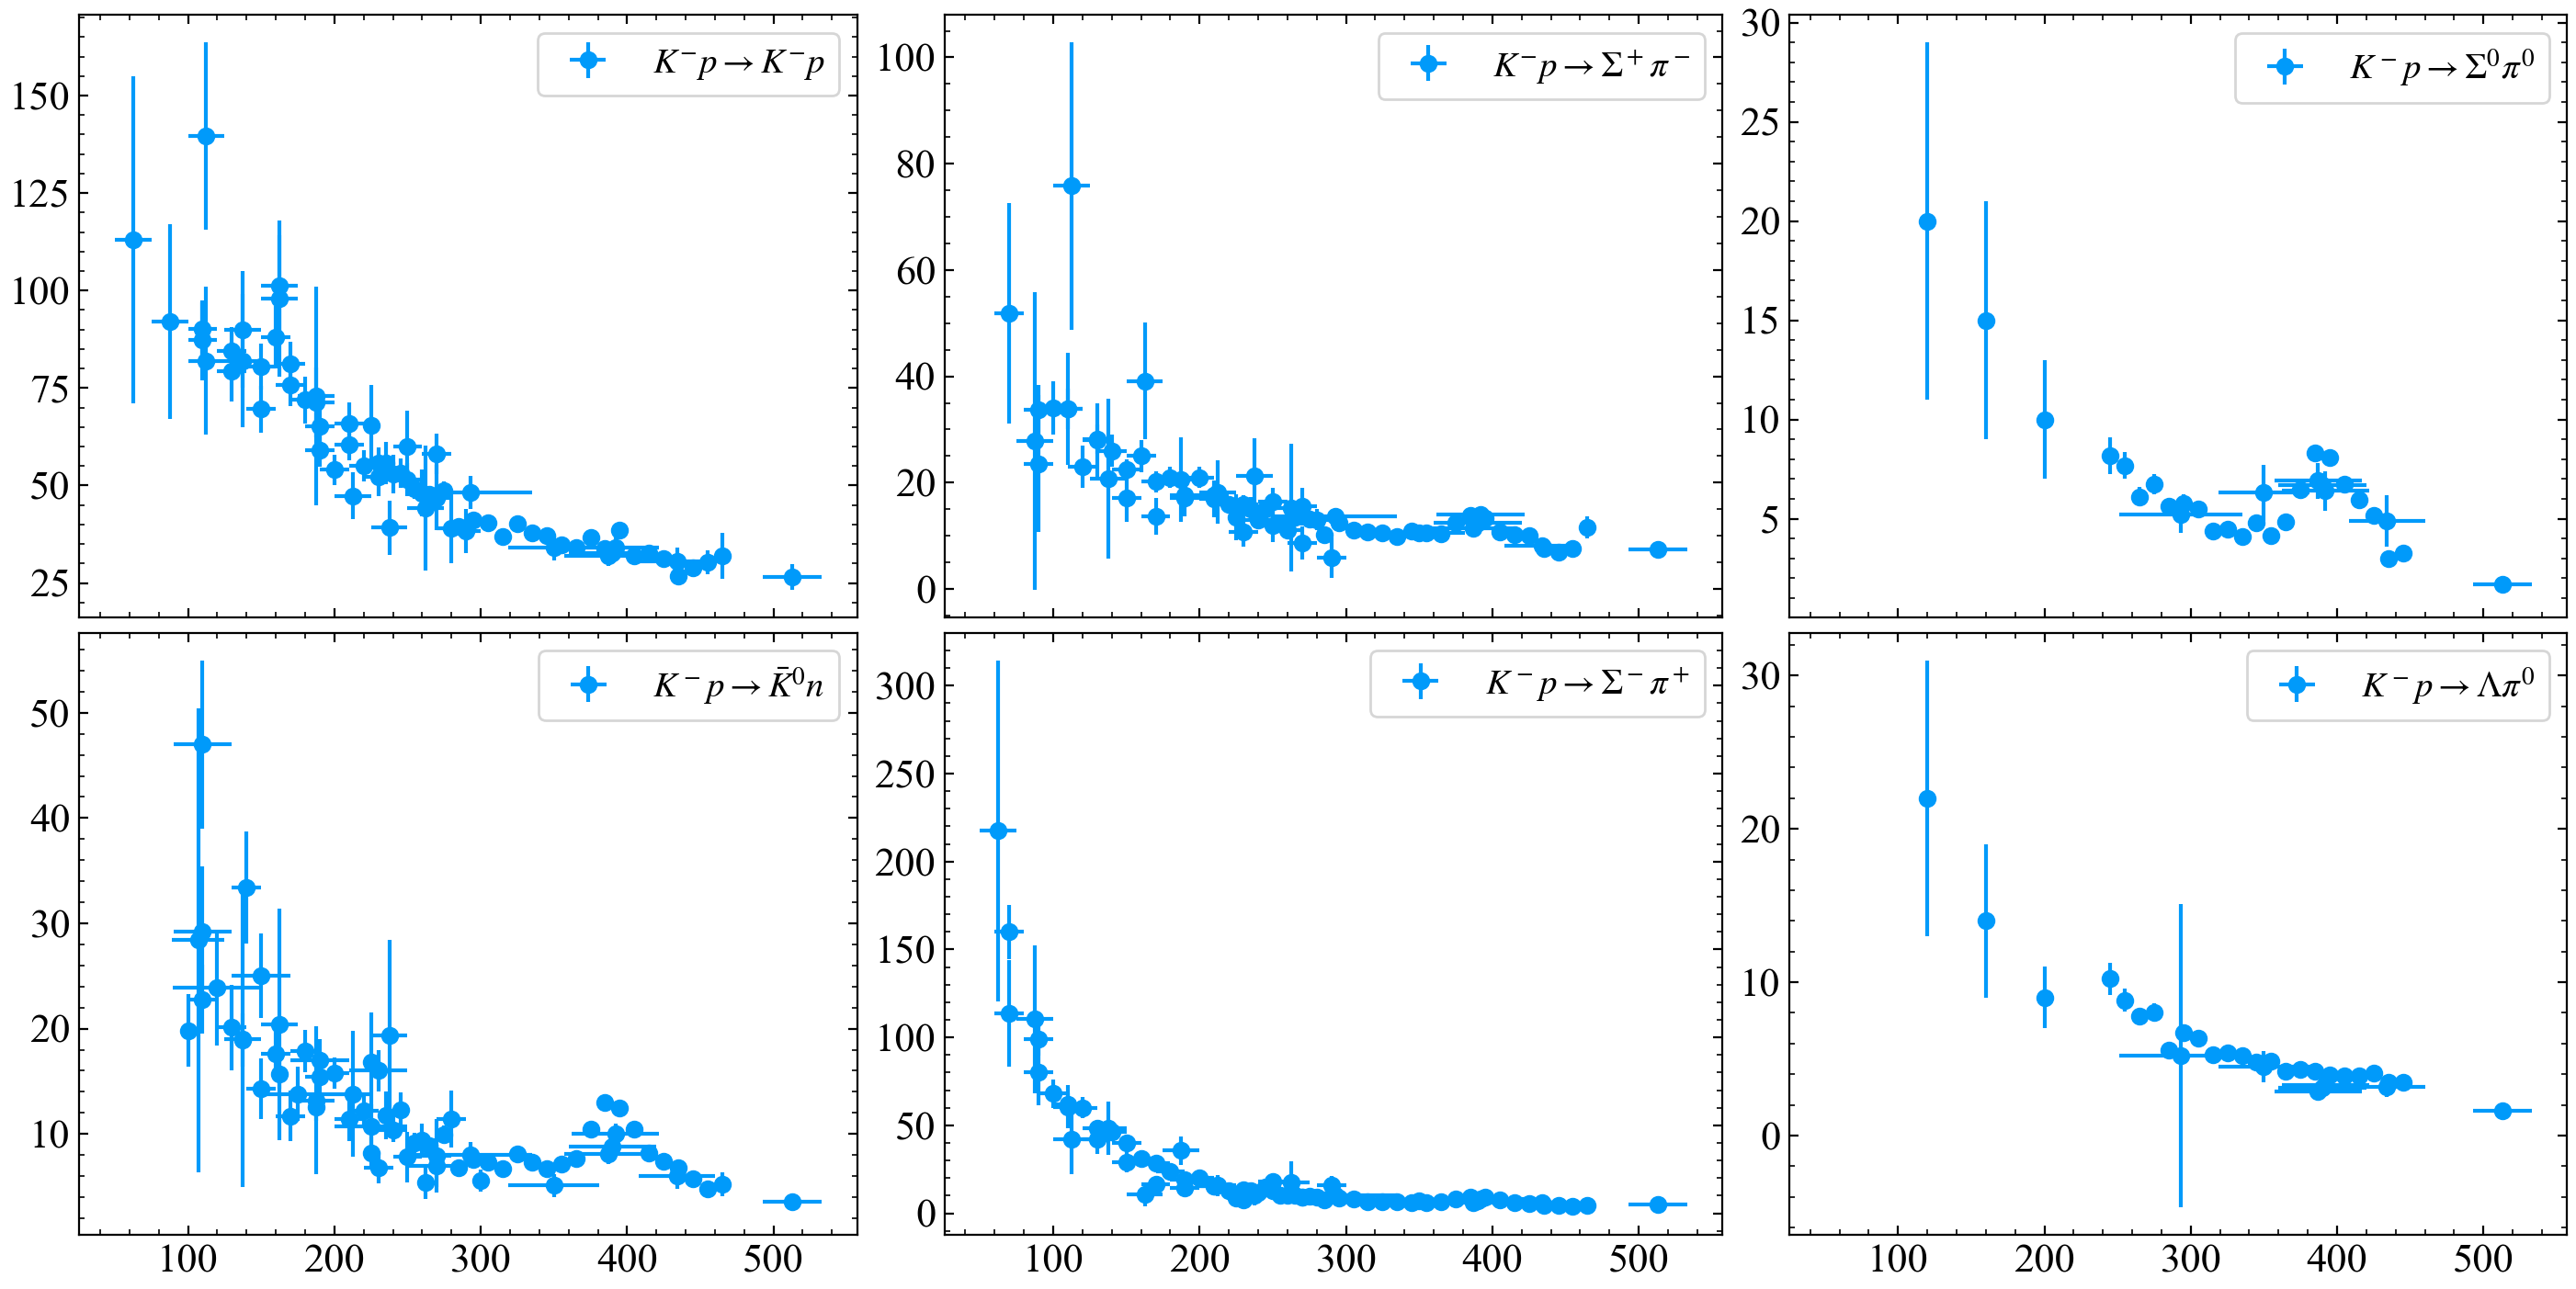

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(14, 7), layout="constrained", sharex=True)
ax[0, 0].errorbar(Kmp["Plab[MeV]"], Kmp["sigma[mb]"], xerr=Kmp["dPlab[MeV]"], yerr=Kmp["dsigma[mb]"], fmt="o", label=r"$K^{-}p\to K^{-}p$")
ax[0, 1].errorbar(Kmp_to_Sigppim["Plab[MeV]"], Kmp_to_Sigppim["sigma[mb]"], xerr=Kmp_to_Sigppim["dPlab[MeV]"], yerr=Kmp_to_Sigppim["dsigma[mb]"], fmt="o", label=r"$K^{-}p\to \Sigma^+ \pi^-$")
ax[0, 2].errorbar(Kmp_to_Sig0pi0["Plab[MeV]"], Kmp_to_Sig0pi0["sigma[mb]"], xerr=Kmp_to_Sig0pi0["dPlab[MeV]"], yerr=Kmp_to_Sig0pi0["dsigma[mb]"], fmt="o", label=r"$K^- p\to\Sigma^0\pi^0$")
ax[1, 0].errorbar(Kmp_to_Kbar0n["Plab[MeV]"], Kmp_to_Kbar0n["sigma[mb]"], xerr=Kmp_to_Kbar0n["dPlab[MeV]"], yerr=Kmp_to_Kbar0n["dsigma[mb]"], fmt="o", label=r"$K^- p\to\bar{K}^0 n$")
ax[1, 1].errorbar(Kmp_to_Sigmpip["Plab[MeV]"], Kmp_to_Sigmpip["sigma[mb]"], xerr=Kmp_to_Sigmpip["dPlab[MeV]"], yerr=Kmp_to_Sigmpip["dsigma[mb]"], fmt="o", label=r"$K^- p \to \Sigma^- \pi^+$")

ax[1, 2].errorbar(Kmp_to_Lampi0["Plab[MeV]"], Kmp_to_Lampi0["sigma[mb]"], xerr=Kmp_to_Lampi0["dPlab[MeV]"], yerr=Kmp_to_Lampi0["dsigma[mb]"], fmt="o", label=r"$K^- p \to \Lambda \pi^0$")

for ax in ax.flat:
    ax.legend()

In [8]:
Kmp_to_Kmp = pd.DataFrame(data=np.array([Ecm(Kmp["Plab[MeV]"], mKm, mp), Kmp["sigma[mb]"], Kmp["dsigma[mb]"]]).T, columns=columns)
Kmp_to_Kbar0n = pd.DataFrame(data=np.array([Ecm(Kmp_to_Kbar0n["Plab[MeV]"], mKm, mp), Kmp_to_Kbar0n["sigma[mb]"], Kmp_to_Kbar0n["dsigma[mb]"]]).T, columns=columns)
Kmp_to_Lampi0 = pd.DataFrame(data=np.array([Ecm(Kmp_to_Lampi0["Plab[MeV]"], mKm, mp), Kmp_to_Lampi0["sigma[mb]"], Kmp_to_Lampi0["dsigma[mb]"]]).T, columns=columns)
Kmp_to_Sigmpip = pd.DataFrame(data=np.array([Ecm(Kmp_to_Sigmpip["Plab[MeV]"], mKm, mp), Kmp_to_Sigmpip["sigma[mb]"], Kmp_to_Sigmpip["dsigma[mb]"]]).T, columns=columns)
Kmp_to_Sig0pi0 = pd.DataFrame(data=np.array([Ecm(Kmp_to_Sig0pi0["Plab[MeV]"], mKm, mp), Kmp_to_Sig0pi0["sigma[mb]"], Kmp_to_Sig0pi0["dsigma[mb]"]]).T, columns=columns)
Kmp_to_Sigppim = pd.DataFrame(data=np.array([Ecm(Kmp_to_Sigppim["Plab[MeV]"], mKm, mp), Kmp_to_Sigppim["sigma[mb]"], Kmp_to_Sigppim["dsigma[mb]"]]).T, columns=columns)

In [9]:
Kmp_to_Kmp.to_csv("./lambda1405_data/Kmp_to_Kmp.csv", index=False)
Kmp_to_Kbar0n.to_csv("./lambda1405_data/Kmp_to_Kbar0n.csv", index=False)
Kmp_to_Lampi0.to_csv("./lambda1405_data/Kmp_to_Lampi0.csv", index=False)
Kmp_to_Sigmpip.to_csv("./lambda1405_data/Kmp_to_Sigmpip.csv", index=False)
Kmp_to_Sig0pi0.to_csv("./lambda1405_data/Kmp_to_Sig0pi0.csv", index=False)
Kmp_to_Sigppim.to_csv("./lambda1405_data/Kmp_to_Sigppim.csv", index=False)